# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [ ]:
# WHO: Policy Makers and Environmental Analysts, will look at this data to see where changes can be made. Carbon Dioxide is one of the greenhouse gases that needs to be eliminated in order for the planet to stop warming up.
# WHAT: Since 1990, there has  been an increase in Carbon Dioxide Emission, Wolrd Leaders are trying to get Net Carbon Emission by 2050, in order to do that they need to start thinking of ways how to stop CO2 completely 
# HOW: Line charts can show trends when exactly carbon dioxide emission went up. 

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

df = pd.read_excel("CO2.xlsx", sheet_name="CO2 emissions from fuel combus", skiprows=5)

df.columns = ["Group ID", "Region"] + df.columns.tolist()[2:]


print("INFO:")
print(df.info())

print("\nDESCRIBE:")
print(df.describe(include='all'))


duplicate_rows = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_rows}")


duplicate_regions = df['Region'].duplicated().sum()
print(f"Duplicate Regions: {duplicate_regions}")


numeric_cols = df.select_dtypes(include=[np.number])
print("\nMean:")
print(numeric_cols.mean())

print("\nMedian:")
print(numeric_cols.median())

print("\nMode:")
print(numeric_cols.mode().iloc[0]) 


missing = df.isnull().sum()
print("\nMissing values (non-zero only):")
print(missing[missing > 0])


df_cleaned = df.dropna(subset=['Region'])


negatives = df_cleaned.select_dtypes(include=[np.number]) < 0
print("\nNegative values per column (possible inconsistency):")
print(negatives.sum()[negatives.sum() > 0])


encoded_df = pd.get_dummies(df_cleaned, columns=['Region'], drop_first=True)
print("\nOne-hot encoded columns added.")


region_counts = df_cleaned['Region'].value_counts()
print("\nRegion distribution (Class balance):")
print(region_counts)


print("\nConclusions:")
print(f"- Dataset usable: {'Yes' if df_cleaned.shape[0] > 0 else 'No'}")
print(f"- Rows with missing 'Region' dropped: {df.shape[0] - df_cleaned.shape[0]}")
print("- Class imbalance present?" +
      (" Yes" if region_counts.max() > 2 * region_counts.median() else " No"))


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Group ID               0 non-null      float64
 1   Region                 63 non-null     object 
 2   1990                   62 non-null     float64
 3   1991                   62 non-null     float64
 4   1992                   62 non-null     float64
 5   1993                   62 non-null     float64
 6   1994                   62 non-null     float64
 7   1995                   62 non-null     float64
 8   1996                   62 non-null     float64
 9   1997                   62 non-null     float64
 10  1998                   62 non-null     float64
 11  1999                   62 non-null     float64
 12  2000                   62 non-null     float64
 13  2001                   62 non-null     float64
 14  2002                   62 non-null     float64
 15  20

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [ ]:
# I searched on Google how to use Matplotlib on how to make the graph.

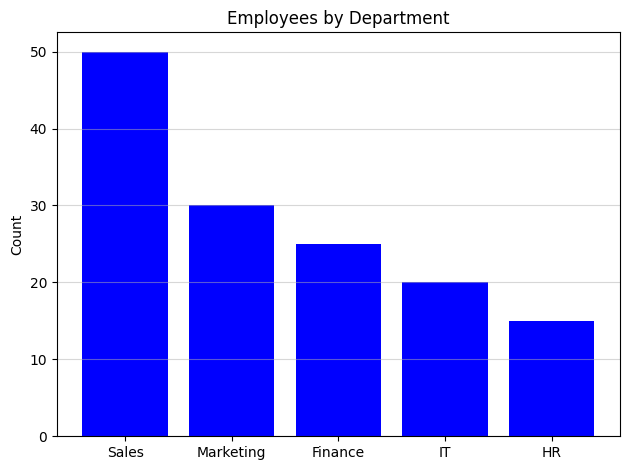

In [ ]:
import matplotlib.pyplot as plt


departments = ['Sales', 'Marketing', 'IT', 'HR', 'Finance']
counts = [50, 30, 20, 15, 25]


departments, counts = zip(*sorted(zip(departments, counts), key=lambda x: x[1], reverse=True))


plt.bar(departments, counts, color='blue')
plt.title('Employees by Department')
plt.ylabel('Count')
plt.grid(axis='y',  alpha=0.5)


plt.tight_layout()
plt.show()